In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')

# Câu hỏi:
Giá xe trung bình của các xe trong các khoảng phân phối của xe ?

Nếu trả lời được câu hỏi này sẽ có lợi ích là sẽ biết được phân khúc giá xe trong từng khoảng phân phối xe. Câu hỏi này do nhóm tự nghỉ ra.

In [2]:
df=pd.read_csv('cars_info_preprocessed.csv')

In [5]:
print("Phân khối xe nhỏ nhất trong dataframe:",df['CC'].min())
print("Phân khối xe lớn nhất trong dataframe:",df['CC'].max())

Phân khối xe nhỏ nhất trong dataframe: 875
Phân khối xe lớn nhất trong dataframe: 7300


Tiếp theo chúng ta sẽ chia phân khối xe thành 10 khoảng từ min của cột CC đến max của cột CC và group by theo theo các thuộc các khoảng đó và tính giá trị trung bình của giá.

In [16]:
cut=pd.cut(df['CC'], np.linspace(df['CC'].min(),df['CC'].max(), 11))
CC_price=df.groupby([cut]).Price.mean().reset_index(name='avg_price')

Vẽ biểu đồ để thể hiện rõ câu trả lời của câu hỏi trên.

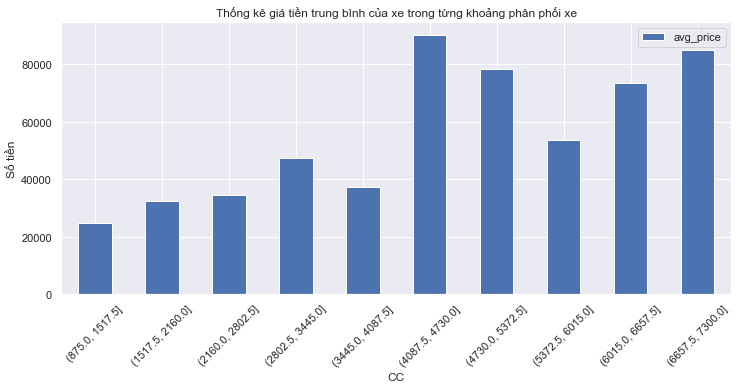

In [37]:
plt.figure(figsize = (12,5))

plt.title("Thống kê giá tiền trung bình của xe trong từng khoảng phân phối xe")
plt.ylabel("Số tiền")
ax=plt.gca()
CC_price.plot.bar(x="CC",ax=ax)
plt.xticks(rotation=45)
plt.show()

Ta có thể thấy phân phối xe cao hay thấp chưa quyết định nhiều đến giá xe nó còn phụ thuộc vào nhiều vào yếu tố khác. Yếu tố phân khối của xe chỉ góp 1 phần trong quyết định giá xe